# Correlation Analysis
# Load Data

- 키, 몸무게 데이터

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/PII.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       17 non-null     object 
 1   Gender     17 non-null     object 
 2   Age        17 non-null     int64  
 3   Grade      17 non-null     int64  
 4   Picture    17 non-null     object 
 5   BloodType  17 non-null     object 
 6   Height     17 non-null     float64
 7   Weight     17 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.2+ KB


In [ ]:
df.head()

,Name,Gender,Age,Grade,Picture,BloodType,Height,Weight
0,송태섭,남자,21,3,무,B,179.1,63.9
1,최유정,여자,23,1,유,A,177.1,54.9
2,이한나,여자,20,1,무,A,167.9,50.2
3,김소혜,여자,23,3,무,O,176.1,53.5
4,서태웅,남자,24,4,무,B,176.1,79.8


# 1. Covariance

> ## 1) 공분산

In [ ]:
import numpy as np
np.cov(df.Height, df.Weight)[0][1]

63.83036764705884

> ## 2) Pearson 상관계수

-  공분산을 두 변수의 표준편차의 곱으로 나눈 값

In [ ]:
np.cov(df.Height, df.Weight)[0][1] /  \
((np.std(df.Height, ddof = 1) *       \
 np.std(df.Weight, ddof = 1)))

0.6848075756314844

# 2. scipy

In [ ]:
from scipy import stats

> ## 1) Karl Pearson 상관계수

- 기본적으로 등간척도/비율척도 변수에만 적용가능

In [ ]:
stats.pearsonr(df.Height, df.Weight)[0]

0.6848075756314843

> ## 2) spearman 상관계수

- 서열척도 변수가 포함되어도 적용가능
- 등간척도/비율척도 두 변수 간의 관계가 비선형적일 때 적용

In [16]:
stats.spearmanr(df.Height, df.Weight)[0]

0.6507060771796446

> ## 3) kendall tau

- spearman 상관계수와 같은 경우 적용가능
- 표본이 작을 때 spearman 상관계수보다 신뢰할 수 있음

In [ ]:
stats.kendalltau(df.Height, df.Weight)[0]

0.5278846884821402

# 3. pandas

> ## 1) Pearson 상관계수

- method('pearson', 'spearman', 'kendall')

In [ ]:
df.corr(method = 'pearson')

,Age,Grade,Height,Weight
Age,1.000000,0.495118,0.349681,0.452384
Grade,0.495118,1.000000,0.312777,0.574785
Height,0.349681,0.312777,1.000000,0.684808
Weight,0.452384,0.574785,0.684808,1.000000


> ## 2) Heat Map

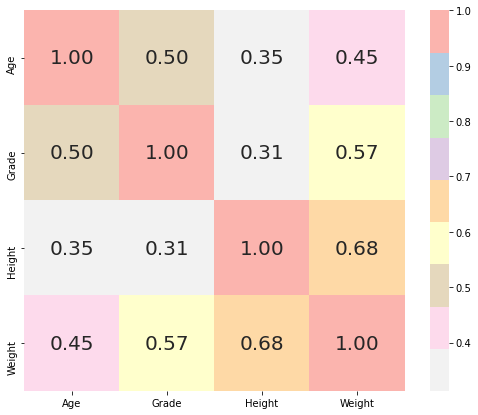

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (9, 7))
sns.heatmap(df.corr(),
            cbar = True,   # colorbar 유무
            annot = True,  # 숫자출력
            annot_kws = {'size' : 20},   # 글씨 크기
            fmt = '.2f',    # 표기 숫자 소수점 2자리까지 출력
            square = True,  # cell이 정사각형 모양
            cmap = 'Pastel1_r') 
plt.show()

# 4. numpy

In [ ]:
import numpy as np

> ## 1) Pearson 상관계수

In [ ]:
np.corrcoef(df.Height, df.Weight)[0][1]

0.6848075756314843

# 5. Visualization

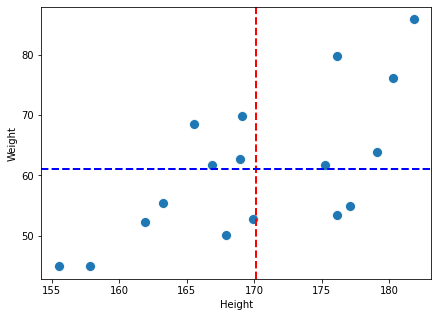

In [ ]:
plt.figure(figsize = (7, 5))
sns.scatterplot(x = df.Height,
                y = df.Weight,
                s = 100)
plt.axvline(df.Height.mean(),
            color = 'r',
            linestyle = 'dashed',
            linewidth = 2)
plt.axhline(df.Weight.mean(),
            color = 'b',
            linestyle = 'dashed',
            linewidth = 2)
plt.show()

###
# The End
###